# Árvore de decisão e Random Forest

## Árvore de decisão

... "Árvores de decisão são modelos estatísticos que utilizam um treinamento supervisionado para a classificação e previsão de dados. Em outras palavras, em sua construção é utilizado um conjunto de treinamento formado por entradas e saídas. Estas últimas são as classes"...

<https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF> Acesso em 23 de abril de 2022.

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import sklearn

In [5]:
  from sklearn.tree import DecisionTreeClassifier

In [6]:
with open('credit.pkl','rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [7]:
X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape, 

((24435, 20), (24435,), (8146, 20), (8146,))

In [8]:
arvore_credit = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
previsoes =arvore_credit.predict(X_credit_teste)
previsoes , y_credit_teste

(array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 0, 0, 1]))

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
accuracy_score(y_credit_teste, previsoes)

0.8949177510434569

0.8949177510434569

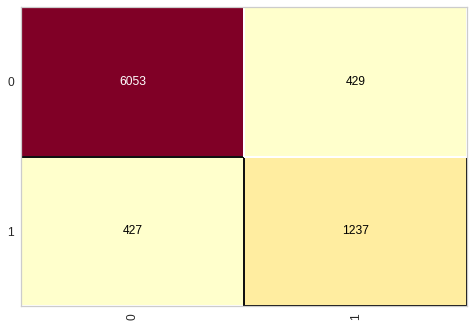

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [14]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6482
           1       0.74      0.74      0.74      1664

    accuracy                           0.89      8146
   macro avg       0.84      0.84      0.84      8146
weighted avg       0.89      0.89      0.89      8146



In [15]:
arvore_credit.feature_importances_

array([0.04513412, 0.16423927, 0.11113241, 0.02037139, 0.00699268,
       0.00139415, 0.05201666, 0.00427499, 0.00698415, 0.0235487 ,
       0.00687074, 0.01134628, 0.01541121, 0.08233317, 0.04613293,
       0.16895748, 0.19578232, 0.00298448, 0.00265014, 0.03144273])

In [16]:
arvore_credit.classes_

array([0, 1])

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree
previsores = ['person_age',
 'person_income',
 'person_home_ownership_1',
 'person_home_ownership_2',
 'person_home_ownership_3',
 'person_home_ownership_4',
 'person_emp_length',
 'loan_intent_1',
 'loan_intent_2',
 'loan_intent_3',
 'loan_intent_4',
 'loan_intent_5',
 'loan_intent_6',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file_1',
 'cb_person_default_on_file_2',
 'cb_person_cred_hist_length', 'Loan_status']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (21,21))

tree.plot_tree(arvore_credit, feature_names=previsores, class_names= ['0','1'], filled=True);
fig.savefig('arvore_credit.png')

KeyboardInterrupt: 

## Random Forest